# Introducción a tensorflow con redes neuronales


### Explicación del Código

1. **Cargar los Datos**: Se carga el dataset de precios de "california housings", que es un conjunto de datos comúnmente utilizado para tareas de regresión. Este conjunto de datos cuenta con 9 variables, la cual "price" es la variable a predecir. 

2. **Visualización y Tratamiento de Valores Nulos**: Se verifica si hay valores nulos en el dataset. En este ejemplo específico no hay valores nulos, pero se incluye la lógica para eliminarlos si existieran.

3. **Gráfica de correlación**: Se estudia el comportamiento de las variables independientes vs la variable dependiente a través de los scores de correlación líneal.

4. **Preprocesamiento**: Se separan las características (X) de la variable objetivo (y), y luego se dividen los datos en conjuntos de entrenamiento y prueba.

5. **Construcción de la Red Neuronal simple**: Se crea una red neuronal "simple" con dos capas ocultas de 64 neuronas cada una y una capa de salida de una neurona para predecir el precio.

6. **Construcción de la Red Neuronal compleja**: Se crea una red neuronal "compleja" con dos capas ocultas de 64 neuronas cada una, una capa dropout y una capa de salida de una neurona para predecir el precio.

7. **Compilación y Entrenamiento**: El modelo se compila usando el optimizador adam y se entrena durante 100 épocas.

8. **Evaluación**: Se evalúa el modelo utilizando el conjunto de prueba y se muestra el error absoluto medio (MAE).

9. **Visualización de Resultados**: Se grafican las curvas de entrenamiento y validación para observar el desempeño del modelo durante el entrenamiento.

In [16]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from tensorflow.keras import layers, models

In [5]:
# 1. Cargar el conjunto de datos
# Usaremos el dataset 'California Housing' de sklearn
california = fetch_california_housing()

In [7]:
# Convertir el dataset a un DataFrame de Pandas
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [8]:
# 2. Visualizar los datos
print("Primeras filas del conjunto de datos:")
print(df.head())

Primeras filas del conjunto de datos:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


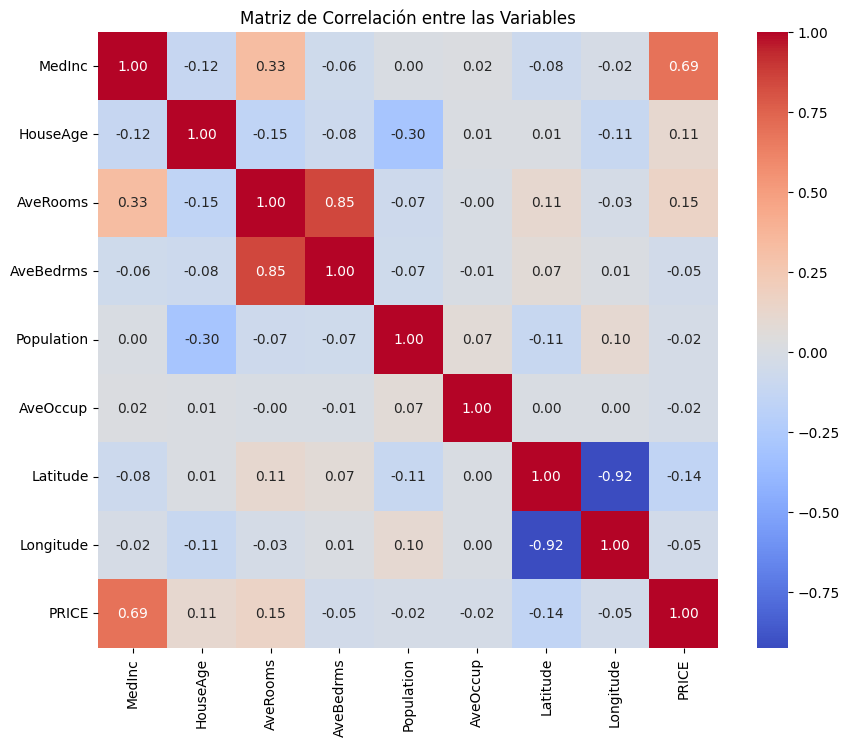

In [17]:
# 3. Matriz de Correlación
corr_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre las Variables')
plt.show()

In [9]:
# Verificar valores nulos
print("\nValores nulos en el dataset:")
print(df.isnull().sum())


Valores nulos en el dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [10]:
# Preprocesamiento de los datos
# Eliminar filas con valores nulos (si las hubiera)
df = df.dropna()

In [11]:
# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [12]:

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# modelo simple
model_linear = models.Sequential()
model_linear.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_linear.add(layers.Dense(64, activation='relu'))
model_linear.add(layers.Dense(1, activation='linear'))  # Capa de salida con activación lineal



C:\Users\NJE_1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compilar el modelo
## Se utiliza un optimizador adam con un loss function mse y una metrica de evaluación mae
model_linear.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Entrenar el modelo
history_linear = model_linear.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18423.0977 - mae: 46.4914 - val_loss: 3.7875 - val_mae: 1.4103
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6015 - mae: 1.3194 - val_loss: 5.0933 - val_mae: 1.8437
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1548 - mae: 1.3055 - val_loss: 1.5113 - val_mae: 0.8633
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2978 - mae: 0.8832 - val_loss: 1.2022 - val_mae: 0.9205
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1491 - mae: 0.8368 - val_loss: 0.9808 - val_mae: 0.7393
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0231 - mae: 0.7919 - val_loss: 0.9124 - val_mae: 0.7685
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.5618 - mae: 1.1568 - val_loss: 0.8304 - val_mae: 0.6895
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.2016 - mae: 0.8304 - val_loss: 0.8988 - val_mae: 0.7017
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s

In [24]:
# Evaluar el modelo
train_mae_linear = model_linear.evaluate(X_train, y_train)[1]
test_mae_linear = model_linear.evaluate(X_test, y_test)[1]
print(f'\nMean Absolute Error (Modelo Lineal con Capas) - Entrenamiento: {train_mae_linear:.2f}')
print(f'Mean Absolute Error (Modelo Lineal con Capas) - Prueba: {test_mae_linear:.2f}')

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4266 - mae: 0.4800
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4457 - mae: 0.4908

Mean Absolute Error (Modelo Lineal con Capas) - Entrenamiento: 0.49
Mean Absolute Error (Modelo Lineal con Capas) - Prueba: 0.50


In [25]:
# Predecir valores
y_train_pred_linear = model_linear.predict(X_train)
y_test_pred_linear = model_linear.predict(X_test)

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:

# Red Neuronal Completa (Modelo Complejo)
model_nn = models.Sequential()
model_nn.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_nn.add(layers.Dropout(0.2))  # Añadir Dropout del 20%
model_nn.add(layers.Dense(64, activation='relu'))
model_nn.add(layers.Dense(1, activation='linear'))  # Capa de salida con activación lineal


In [22]:
# Compilar el modelo
model_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history_nn = model_nn.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3402.9077 - mae: 33.4673 - val_loss: 4.8600 - val_mae: 1.3242
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 190.5027 - mae: 8.3654 - val_loss: 33.2376 - val_mae: 4.9977
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 81.1506 - mae: 5.4695 - val_loss: 3.9382 - val_mae: 1.4781
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 50.1566 - mae: 4.3185 - val_loss: 3.4765 - val_mae: 1.5282
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.7037 - mae: 3.0144 - val_loss: 30.6849 - val_mae: 4.2168
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.1919 - mae: 2.7063 - val_loss: 17.0323 - val_mae: 3.1337
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25.2052 - mae: 2.6852 - val_loss: 1.6856 - val_mae: 0.9553
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.6003 - mae: 1.7971 - val_loss: 1.3378 - val_mae: 0.8731
Epoch 9/100
413/413 ━━━━━━━━━━━━━━

In [23]:
# Evaluar el modelo
train_mae_nn = model_nn.evaluate(X_train, y_train)[1]
test_mae_nn = model_nn.evaluate(X_test, y_test)[1]
print(f'\nMean Absolute Error (Red Neuronal Completa) - Entrenamiento: {train_mae_nn:.2f}')
print(f'Mean Absolute Error (Red Neuronal Completa) - Prueba: {test_mae_nn:.2f}')

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - loss: 0.5507 - mae: 0.5463
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5646 - mae: 0.5530

Mean Absolute Error (Red Neuronal Completa) - Entrenamiento: 0.55
Mean Absolute Error (Red Neuronal Completa) - Prueba: 0.56


In [26]:

# Predecir valores
y_train_pred_nn = model_nn.predict(X_train)
y_test_pred_nn = model_nn.predict(X_test)

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


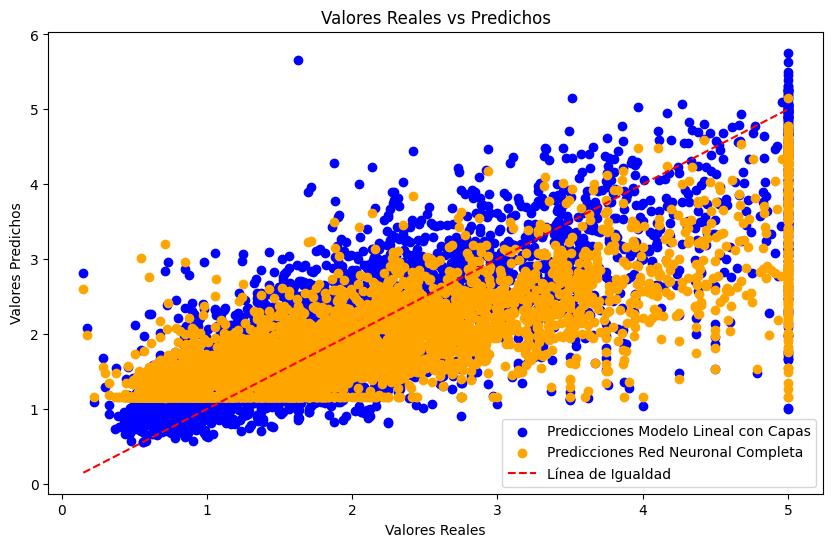

In [27]:

# Graficar Actual vs Predicho para ambos modelos en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_linear, color='blue', label='Predicciones Modelo Lineal con Capas')
plt.scatter(y_test, y_test_pred_nn, color='orange', label='Predicciones Red Neuronal Completa')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea de Igualdad')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.legend()
plt.show()


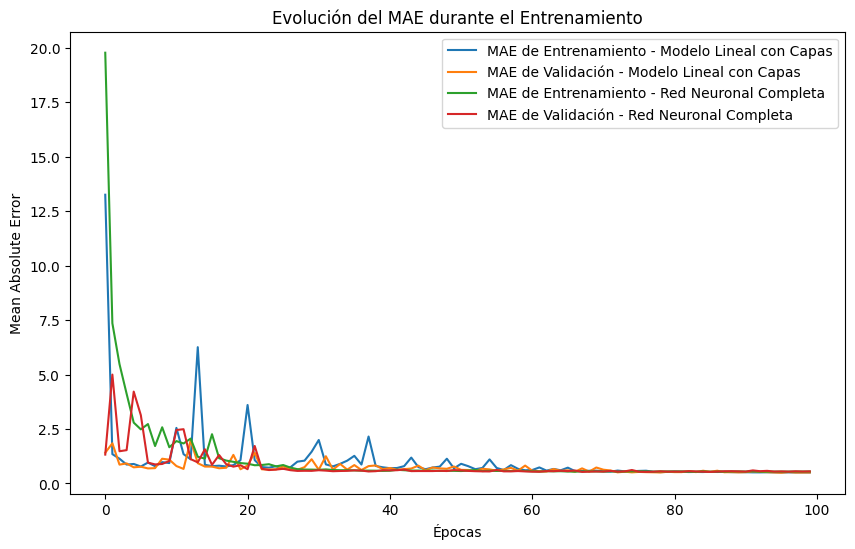

In [28]:
# Graficar la evaluación del entrenamiento y validación
plt.figure(figsize=(10, 6))
plt.plot(history_linear.history['mae'], label='MAE de Entrenamiento - Modelo Lineal con Capas')
plt.plot(history_linear.history['val_mae'], label='MAE de Validación - Modelo Lineal con Capas')
plt.plot(history_nn.history['mae'], label='MAE de Entrenamiento - Red Neuronal Completa')
plt.plot(history_nn.history['val_mae'], label='MAE de Validación - Red Neuronal Completa')
plt.xlabel('Épocas')
plt.ylabel('Mean Absolute Error')
plt.title('Evolución del MAE durante el Entrenamiento')
plt.legend()
plt.show()

Aunque el modelo de red neuronal completa inicia con un mae mayor, se estabiliza mejor en el tiempo (epocas) que la red neuronal simple.

Preguntas:

1. ¿Por qué se estabiliza mejor el mae de la red neuornal "compleja" vs la "simple"?, ¿tiene alguna injerencia el dropput?
2. Y ¿por qué no se observa del mismo modo en la parte de evaluación? 
3. Con respecto a la gráfica de correlación, ¿qué variables no tomarías en cuenta para el entrenamiento?

Respuestas: 
1. ¿Por qué se estabiliza mejor el MAE de la red neuronal "compleja" vs la "simple"? ¿Tiene alguna injerencia el dropout?
Estabilización del MAE:

    Capacidad del Modelo: La red neuronal "compleja" tiene una arquitectura más rica, lo que le permite capturar patrones más complejos en los datos. Aunque puede tener un MAE inicial más alto, su capacidad para aprender de datos complejos puede llevar a una estabilización más efectiva a medida que el entrenamiento avanza.

    Dropout: El dropout actúa como una técnica de regularización. Al aleatoriamente "apagar" algunas neuronas durante el entrenamiento, ayuda a prevenir el sobreajuste (overfitting). Esto permite que el modelo generalice mejor a datos no vistos, lo que puede contribuir a una mejor estabilización del MAE en épocas posteriores.

    Impacto del Dropout:
    El dropout puede mejorar la capacidad de generalización del modelo al reducir la dependencia de características específicas del entrenamiento. Esto puede explicar por qué la red neuronal compleja se estabiliza mejor en comparación con la simple.

2. ¿Por qué no se observa del mismo modo en la parte de evaluación?
Diferencias en Evaluación:

    Sobreajuste: La red neuronal simple puede estar más propensa a sobreajustar a los datos de entrenamiento, lo que se refleja en un MAE más alto durante la evaluación. La red neuronal compleja, con el dropout, puede estar mejor regulada y, por lo tanto, mostrar un mejor rendimiento generalizado en la evaluación.

    Tamaño del Conjunto de Datos y Complejidad: A veces, la complejidad adicional de un modelo puede no ser completamente capturada en el conjunto de evaluación si el modelo no ha tenido suficiente tiempo para aprender o si el conjunto de evaluación no refleja bien la variabilidad de los datos. La red neuronal compleja puede necesitar más épocas para mostrar su verdadero potencial.

3. Con respecto a la gráfica de correlación, ¿qué variables no tomarías en cuenta para el entrenamiento?
Variables a Considerar:

    Baja Correlación con la Variable Objetivo: En la gráfica de correlación, identifica las variables que tienen una baja correlación con la variable objetivo (en este caso, PRICE). Las variables con baja correlación (cercanas a 0) pueden no proporcionar información útil para la predicción y podrían ser menos relevantes para el modelo.

    Multicolinealidad: Si alguna variable muestra alta correlación con otras variables independientes (multicolinealidad), podrías considerar eliminarla para reducir redundancia y mejorar la interpretabilidad del modelo.

Ejemplo:

Si en tu matriz de correlación encuentras variables con baja correlación con PRICE, estas variables podrían ser consideradas para su eliminación del modelo. Además, si encuentras variables que están altamente correlacionadas entre sí, podrías considerar realizar un análisis adicional para seleccionar las más representativas.